<a href="https://colab.research.google.com/github/AnIsAsPe/Aprendizaje-por-Refuerzo/blob/main/Notebooks/Estrategia_Exploraci%C3%B3nExplotaci%C3%B3n_Multi_Armed_Bandit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Bibliotecas y Funciones


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def entorno_multi_armed_bandit(maquinas):
    '''
    Creamos el entorno para el problema "multi_armed_bandit" generando aleatoriamente
    la distribución de probabilidad de los premios que otorga cada máquina
    '''
    premio_medio = np.random.uniform(-10, 5, size=maquinas)
    desv_estandar = np.random.uniform(0, 5, size=maquinas)
    return premio_medio, desv_estandar

In [3]:
def init_Q(maquinas):
  '''Inicializa el vector Q en ceros, el vector Q representa el valor esperado
   de recompensa de cada máquina'''
  Q =np.zeros(shape =(1, maquinas))
  return Q

In [4]:
def selecciona_maquina(maquinas):
    '''selecciona una máquina aleatoriamente con distribución unifome'''
    selec = np.random.choice(range(maquinas))
    return selec

In [5]:
def selecciona_maquina_expl(maquinas):
    '''selecciona la maquina con el maximo valor de la ganancia esperada'''
    select = np.argmax(Q[0])
    return selec

In [6]:
def selecciona_maquina_egd(maquinas, ε):
    '''selecciona una con la estrategia epsilon decreasing greedy'''
    p = np.random.uniform(0,1)

    # cuándo epsilon es pequeño, se escoge la maquina con mayor ganancia
    if p < (1 - ε):
        selec = np.argmax(Q[0])
        return selec  

    # cuando epsilon es pequeño, se escoge una al azar
    else: 
        selec = np.random.choice(range(maquinas))
        return selec

In [7]:
def calcula_recompensa(selec):
  '''calcula la recompensa de jugar en una determinada máquina'''
  r = int(np.random.normal(premio_medio[selec], desv_estandar[selec], 1))
  return r

In [8]:
def actualiza_Q (Q, selec, r, veces_maq):
    '''actualiza el valor esperados de recompensa de la máquina seleccionada'''
    Q[0, selec] = Q[0, selec] + 1/(veces_maq[selec])*(r - Q[0, selec])
    return Q

# Introducción

## Definimos nuestro entorno

In [9]:
### Creamos el entorno definiendo el comportamiento de cada máquina

premio_medio  = np.array([1,  2,  0, -10])
desv_estandar = np.array([1, 0.1, 5,  1])

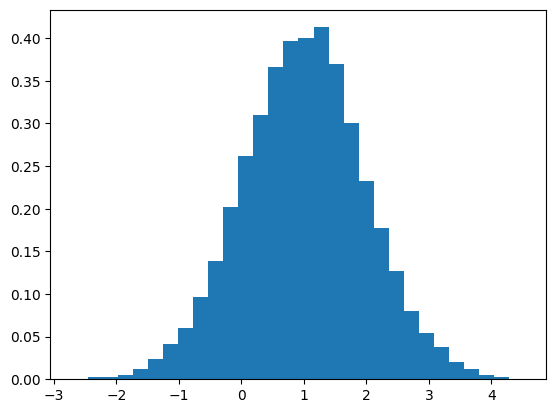


La máquina arrojo durante los primeras 10 jugadas los siguientes premios: 

[ 1.6476776  -0.03761306  2.42363444 -0.40364004  0.42771171 -0.77311108
  0.84472552  1.76013884  1.41648022  0.74987173]


In [10]:
maquina = 0

#  r es el premio aleatorio que va a dar una máquina (dada su distribución)
r = np.random.normal(premio_medio[maquina], desv_estandar[maquina],10000)  
plt.hist( r, bins=30,  density=True)
plt.show()
print('\nLa máquina arrojo durante los primeras 10 jugadas los siguientes premios: \n')
print (r[0:10])

## ¿Que hace un jugador en el casino?

* inicializamos en cero la variable que guardará los premios o perdidas acumuladas 

In [11]:
premio_acumulado = 0

* seleccionamos una de las maquinas, 
* jugamos en ella y obtenemos la recompensa (o pérdida)
* se suma la recompensa o perdida al total acumulado

In [12]:
# 1) se selecciona una máquina
selec = 3

# 2) jugamos en la máquina seleccionada y  se obtiene una recompensa o pérdida
r = int(np.random.normal(premio_medio[selec], desv_estandar[selec], 1))

# 3) se suma al premio acumulado
premio_acumulado += r
print('recompensa (r):', r)
print('Premio acumulado:', premio_acumulado)

recompensa (r): -9
Premio acumulado: -9


##  ¿Cómo guardamos la información de los premios obtenidos de cada máquina?

Promedio Incremental

$Q =  Q_{n-1}+\frac{1}{n} (r_n - Q_{n-1})$

In [13]:
# Inicializa el vector Q en ceros, donde guardaremos la información
n_maquinas = 4 
Q = np.zeros(shape =(1, n_maquinas))
Q

array([[0., 0., 0., 0.]])

In [16]:
# Vamos a jugar cierto número de veces (episodios)
episodios = 20
n_maquinas = 4
Q =np.zeros(shape =(1, n_maquinas))
premio_acumulado = 0

veces_maq = np.zeros(n_maquinas)      # guardaremos las veces que se va jugando en cada máquina


for ep in range(1, episodios+1):
      # 1) se selecciona una máquina
      selec = np.random.choice([0,1,2,3]) # selección aleatoria -> exploración
      veces_maq[selec] += 1               # actualizamos las veces que se ha jugado x máquina

      # 2) jugamos en la máquina seleccionada y  se obtiene una recompensa o pérdida
      r = int(np.random.normal(premio_medio[selec], desv_estandar[selec], 1))

      # 3) se suma al premio acumulado
      premio_acumulado += r

      # 4) actualizamos la información con lo que aprendimos de la maquina en la que jugamos
      
      Q[0, selec] = Q[0, selec] + 1/(veces_maq[selec])*(r - Q[0, selec])   # Promedio incremental

      # 5) reportamos el progreso del aprendizaje
      print('Episodio_{}, Máquina {}, \Premio = {}, Premio_acum = {}, Q:{} \n'.format(ep,
                                                                                     selec,
                                                                                     r, 
                                                                                     premio_acumulado,
                                                                                     Q.round(2)))


Episodio_1, Máquina 2, \Premio = 1, Premio_acum = 1, Q:[[0. 0. 1. 0.]] 

Episodio_2, Máquina 3, \Premio = -9, Premio_acum = -8, Q:[[ 0.  0.  1. -9.]] 

Episodio_3, Máquina 0, \Premio = 2, Premio_acum = -6, Q:[[ 2.  0.  1. -9.]] 

Episodio_4, Máquina 2, \Premio = 0, Premio_acum = -6, Q:[[ 2.   0.   0.5 -9. ]] 

Episodio_5, Máquina 3, \Premio = -10, Premio_acum = -16, Q:[[ 2.   0.   0.5 -9.5]] 

Episodio_6, Máquina 3, \Premio = -11, Premio_acum = -27, Q:[[  2.    0.    0.5 -10. ]] 

Episodio_7, Máquina 2, \Premio = 1, Premio_acum = -26, Q:[[  2.     0.     0.67 -10.  ]] 

Episodio_8, Máquina 2, \Premio = 2, Premio_acum = -24, Q:[[  2.   0.   1. -10.]] 

Episodio_9, Máquina 2, \Premio = 0, Premio_acum = -24, Q:[[  2.    0.    0.8 -10. ]] 

Episodio_10, Máquina 1, \Premio = 2, Premio_acum = -22, Q:[[  2.    2.    0.8 -10. ]] 

Episodio_11, Máquina 2, \Premio = -5, Premio_acum = -27, Q:[[  2.     2.    -0.17 -10.  ]] 

Episodio_12, Máquina 2, \Premio = 0, Premio_acum = -27, Q:[[  2.     2. 

¿Sería correcto si, en lugar de escojer la máquina de forma aleatoria, escojemos la que más rendimientos ha dado?

In [17]:
selec = np.argmax(Q[0])  # selección usando la estrategia de explotación
selec

1

¿Podemos pensar en una estrategia combinada?

In [18]:
p = np.random.uniform(0, 1 )  # escojemos un valor entre 0 y 1
ε = .99 # valor que disminuye desde 1 hasta 0 según avance el aprendizaje
print('p = {}, ε = {}'.format(p,ε))
print('¿p es menor que 1 - ε?', p < (1 - ε))
if p < (1 - ε):
    # Explotación
    print('explotación')
    selec = np.argmax(Q[0])
else: 
    # Exploración
    print('exploración')
    selec = np.random.choice(range(n_maquinas))
print('Máquina seleccionada: ',selec)

p = 0.8679281292675212, ε = 0.99
¿p es menor que 1 - ε? False
exploración
Máquina seleccionada:  3


In [19]:
p = np.random.uniform(0, 1 )  # escojemos un valor entre 0 y 1
ε = 0.01 # valor que disminuye desde 1 hasta 0 según avance el aprendizaje
print('p = {}, ε = {}'.format(p,ε))
print('¿p es menor que 1 - ε?', p < (1 - ε))
if p < (1 - ε):
    # Explotación
    print('explotación')
    selec = np.argmax(Q[0])
else: 
    # Exploración
    print('exploración')
    selec = np.random.choice(range(n_maquinas))
print('Máquina seleccionada: ',selec)

p = 0.21210971778945564, ε = 0.01
¿p es menor que 1 - ε? True
explotación
Máquina seleccionada:  1


Vamos a calcular  ε en función de los episodios, de manera decreciente


In [20]:
episodios = 100
epsilon_vec = np.exp(-5 * np.linspace(0, 1, episodios))
epsilon_vec

array([1.        , 0.95074913, 0.9039239 , 0.85940486, 0.81707842,
       0.7768366 , 0.73857671, 0.70220117, 0.66761715, 0.63473642,
       0.6034751 , 0.57375342, 0.54549556, 0.51862943, 0.49308648,
       0.46880154, 0.44571265, 0.42376092, 0.40289032, 0.38304762,
       0.36418219, 0.3462459 , 0.32919299, 0.31297995, 0.29756541,
       0.28291005, 0.26897649, 0.25572916, 0.24313428, 0.2311597 ,
       0.21977488, 0.20895078, 0.19865977, 0.1888756 , 0.17957331,
       0.17072917, 0.16232061, 0.15432618, 0.14672548, 0.13949912,
       0.13262867, 0.12609659, 0.11988622, 0.11398172, 0.10836802,
       0.1030308 , 0.09795645, 0.09313201, 0.08854517, 0.08418425,
       0.0800381 , 0.07609615, 0.07234835, 0.06878513, 0.0653974 ,
       0.06217652, 0.05911428, 0.05620285, 0.05343481, 0.0508031 ,
       0.048301  , 0.04592213, 0.04366043, 0.04151011, 0.0394657 ,
       0.03752198, 0.03567399, 0.03391702, 0.03224658, 0.0306584 ,
       0.02914845, 0.02771286, 0.02634798, 0.02505032, 0.02381

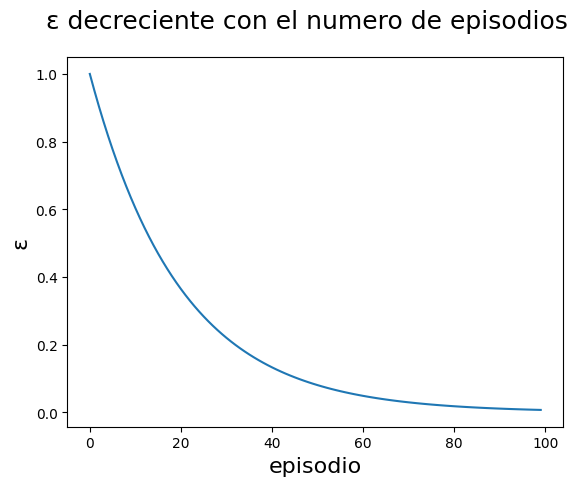

In [21]:
fig =plt.figure()
plt.plot(epsilon_vec)
plt.xlabel('episodio', fontsize=16)
plt.ylabel('ε', fontsize=16)
fig.suptitle('ε decreciente con el numero de episodios', fontsize=18)

plt.show()

# Aprendizaje con distintas estrategias

In [22]:
# ### Definimos el número de máquinas o brazos del problema
# n_maquinas = 3

# ### Creamos el entorno
# np.random.seed(28)
# premio_medio, desv_estandar = entorno_multi_armed_bandit(n_maquinas)  # inicializa la distribución de probabilidad de cada máquina
### Definimos el número de episodios (juegos)
episodios = 100000

## Exploración

In [24]:
### Inicializamos el vector Q  
Q = init_Q(n_maquinas)  
premio_acumulado = 0
veces_maq = np.zeros(n_maquinas)      # guardaremos las veces que se ha jugado por máquina
for episodio in range(1,episodios+1):
    selec = selecciona_maquina(n_maquinas)
    veces_maq[selec] += 1               # actualizamos las veces que se ha jugado x máquina
    # Calcula el premio de esa acción
    r = calcula_recompensa(selec)
    # Actualiza la información de los premios acumulados por cada máquina
    Q = actualiza_Q(Q, selec, r, veces_maq)
  
    premio_acumulado += r
  
print("La ganancia total es de: ", premio_acumulado)

La ganancia total es de:  -184725


## Explotación

In [25]:
### Inicializamos el vector Q  
Q = init_Q(n_maquinas)  
premio_acumulado = 0
veces_maq = np.zeros(n_maquinas)      # guardaremos las veces que se ha jugado por máquina
for i in range(n_maquinas):  # creamos un ciclo para jugar en cada máquina
    veces_maq[i] += 1               # actualizamos las veces que se ha jugado x máquina
    r = calcula_recompensa(i)
    Q = actualiza_Q(Q, i, r, veces_maq)
    premio_acumulado += r
for episodio in range(n_maquinas+1 ,episodios+1): # el resto de los episodios los jugamos con una estrategia codiciosa
    selec = selecciona_maquina_expl(n_maquinas)
    veces_maq[selec] += 1               # actualizamos las veces que se ha jugado x máquina
    r = calcula_recompensa(selec)
    Q = actualiza_Q(Q, selec, r, veces_maq)
    premio_acumulado += r
print("El premio acumulado es de: ", premio_acumulado)

El premio acumulado es de:  65789


## Epsilon decreasing greedy

In [26]:
### Inicializamos el vector Q  
Q = init_Q(n_maquinas)  
epsilon_vec = np.exp(-5 * np.linspace(0, 1, episodios))  # creamos el vector con un epsilon para cada episodio
premio_acumulado = 0
veces_maq = np.zeros(n_maquinas)      # guardaremos las veces que se ha jugado por máquina
for episodio in range(1 ,episodios+1):
    ε = epsilon_vec[episodio-1]  #epsilon decreciente
    selec = selecciona_maquina_egd(n_maquinas, ε)
    veces_maq[selec] += 1               # actualizamos las veces que se ha jugado x máquina
    r = calcula_recompensa(selec)
    Q = actualiza_Q(Q, selec, r, veces_maq)
    premio_acumulado += r

print("El premio acumulado es de: ", premio_acumulado)

El premio acumulado es de:  84050


# Referencias:

[1]A. Aristizabal, «Understanding Reinforcement Learning Hands-On: Multi-Armed Bandits», Medium, oct. 19, 2020. https://towardsdatascience.com/understanding-reinforcement-learning-hands-on-part-2-multi-armed-bandits-526592072bdc (accedido jul. 30, 2021).

